In [229]:
"""
@ Author : Anirudh Sathish 
@ Roll_No : CS20B1125 

"""

"""
Write a Python program (with pandas) to do the following on the
 data file “landslide_data2_miss.csv”.
a) Plot a graph of the attribute names (x-axis)
 with the number of missing values in them (y-axis).(separate python file)
b) Target attribute is “stationid”, 
Drop the tuples (rows) having missing values in the target attribute.
Print the total number of tuples deleted.
 Delete (drop) the tuples (rows) having equal to
or more than one third of attributes with missing values.
 Print the total number of tuples deleted.
c) After (b), count and print the number of missing values
 in each attributes. 
Also find and print the total number of missing values in the file
 (after the deletion of tuples)

2. Experiments on filling in missing values: 
a) Replace the missing values by mean of their respective attribute.
    Compute the mean, median, mode and standard deviation for 
    each attributes and compare the same with that of the original file.
    Calculate the root mean square error (RMSE) between the
    original and replaced values for each attribute.
    Compute RMSE given by the equation at the end of the question.
    Plot these RMSE with respect to the attributes. 
b) Replace the missing values in each attribute using the
   linear interpolation technique. Use df.interpolate() with
   suitable arguments.
   Compute the mean, median, mode and standard deviation 
   for each attributes and compare with that of the original file.
   Calculate the root mean square error (RMSE) between the original and replaced values for each attributes. (Get original values from the original file provided). Compute RMSE given by the equation at the end of the question. Plot this RMSE with respect to the attributes.
c) Outlier detection:
	i) After replacing the missing values by interpolation method,
	find and list the outliers in the attributes “temperature” and “rain”.
	Outliers are the values that do not satisfy the condition 
	(Q1 – (1.5 * IQR)) < x < (Q3 + (1.5 * IQR)),
 	where x is the value of the attribute, IQR is the interquartile range,
	Q1 and Q3 are the first and third quartiles.
 	Obtain the boxplot for these attributes.

ii) Replace these outliers with the median of the attribute.
 	Plot the boxplot again and observe the difference with that
 	of the boxplot from the previous box in 
 	(i). Do you still get outliers? Why?
"""


'\nWrite a Python program (with pandas) to do the following on the\n data file “landslide_data2_miss.csv”.\na) Plot a graph of the attribute names (x-axis)\n with the number of missing values in them (y-axis).(separate python file)\nb) Target attribute is “stationid”, \nDrop the tuples (rows) having missing values in the target attribute.\nPrint the total number of tuples deleted.\n Delete (drop) the tuples (rows) having equal to\nor more than one third of attributes with missing values.\n Print the total number of tuples deleted.\nc) After (b), count and print the number of missing values\n in each attributes. \nAlso find and print the total number of missing values in the file\n (after the deletion of tuples)\n\n2. Experiments on filling in missing values: \na) Replace the missing values by mean of their respective attribute.\n    Compute the mean, median, mode and standard deviation for \n    each attributes and compare the same with that of the original file.\n    Calculate the roo

In [230]:
# Defining the neccesary header files 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import math
# For temperature
from statistics import median


In [231]:
# Opening the neccesary file 
missing_landslide_data = pd.read_csv("landslide_data3_miss.csv")
print(missing_landslide_data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 945 entries, 0 to 944
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   dates         945 non-null    object 
 1   stationid     926 non-null    object 
 2   temperature   879 non-null    float64
 3   humidity      900 non-null    float64
 4   pressure      868 non-null    float64
 5   rain          907 non-null    float64
 6   lightavgw/o0  898 non-null    float64
 7   lightmax      914 non-null    float64
 8   moisture      914 non-null    float64
dtypes: float64(7), object(2)
memory usage: 66.6+ KB
None


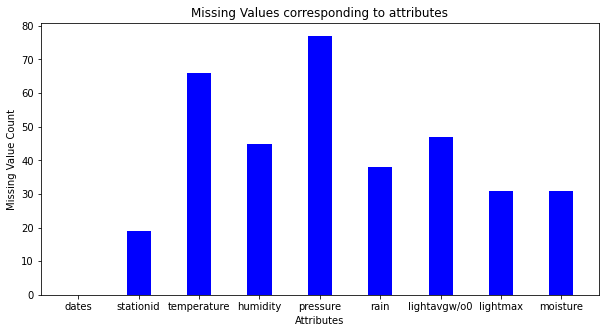

In [232]:
# (a) Plotting the missing values vs Attributes
missing_val = missing_landslide_data.isnull()
missingWithColumn = missing_val.sum()
fig = plt.figure(figsize = (10, 5))

values = missingWithColumn.to_list()

missingWithColumn = missingWithColumn.to_frame() 
# creating the bar plot
plt.bar(missingWithColumn.index ,values, color ='blue',
        width = 0.4)
 
plt.xlabel("Attributes")
plt.ylabel("Missing Value Count")
plt.title("Missing Values corresponding to attributes")
plt.show()


In [233]:
clean_targetAttribute  = missing_landslide_data[missing_landslide_data["stationid"].notnull()]
print(clean_targetAttribute.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 926 entries, 0 to 944
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   dates         926 non-null    object 
 1   stationid     926 non-null    object 
 2   temperature   864 non-null    float64
 3   humidity      885 non-null    float64
 4   pressure      853 non-null    float64
 5   rain          893 non-null    float64
 6   lightavgw/o0  883 non-null    float64
 7   lightmax      899 non-null    float64
 8   moisture      896 non-null    float64
dtypes: float64(7), object(2)
memory usage: 72.3+ KB
None


In [234]:
# Initial number of tuples 
tuple_inital = missing_landslide_data.shape[0]

# Tuple after drop 
tuple_afterDrop = clean_targetAttribute.shape[0]

tuple_difference = tuple_inital - tuple_afterDrop
print("\n")
print("---------------------------------------------------------")
print("Rows Deleted after removing NAN values from :" , tuple_difference)
print("---------------------------------------------------------")
print("\n")




---------------------------------------------------------
Rows Deleted after removing NAN values from : 19
---------------------------------------------------------




In [235]:
""" 
Removing values where the no of null values in a tuple is equal to
or more than third of the attributes
"""
update_clean_targetAttribute = clean_targetAttribute.dropna(thresh = 7 , axis = 0 )
print(update_clean_targetAttribute.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 944
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   dates         891 non-null    object 
 1   stationid     891 non-null    object 
 2   temperature   857 non-null    float64
 3   humidity      878 non-null    float64
 4   pressure      850 non-null    float64
 5   rain          885 non-null    float64
 6   lightavgw/o0  876 non-null    float64
 7   lightmax      890 non-null    float64
 8   moisture      885 non-null    float64
dtypes: float64(7), object(2)
memory usage: 69.6+ KB
None


In [236]:
Final_update_tuple = update_clean_targetAttribute.shape[0]
new_diff = tuple_afterDrop - Final_update_tuple
print("\n")
print("---------------------------------------------------------")
print("Difference after Removing Tuples with too many NAN values : ",new_diff)
print("Total Tuples Deteleted : ",new_diff+tuple_difference)
print("---------------------------------------------------------")
print("\n")



---------------------------------------------------------
Difference after Removing Tuples with too many NAN values :  35
Total TUples Deteleted :  54
---------------------------------------------------------




In [237]:
# Answer to the C Part 
""" 
    TO FIND THE REMAINING MISSING VALUES AFTER ALL THE CLEANING 
 """
print("\n")
print("---------------------------------------------------------")
print("TO FIND THE REMAINING MISSING VALUES AFTER ALL THE CLEANING ")
Final_missing_val = update_clean_targetAttribute.isnull()
FinalMissingColumnWise = Final_missing_val.sum()
print("Column wise Missing Values :\n" ,FinalMissingColumnWise)
FinalMissing = FinalMissingColumnWise.sum()
print("Final Missing Values : " , FinalMissing)





---------------------------------------------------------
TO FIND THE REMAINING MISSING VALUES AFTER ALL THE CLEANING 
Column wise Missing Values :
 dates            0
stationid        0
temperature     34
humidity        13
pressure        41
rain             6
lightavgw/o0    15
lightmax         1
moisture         6
dtype: int64
Final Missing Values :  116


In [238]:
""" 2. Experiments on filling in missing values: 
    a) Replace the missing values by mean of their respective attribute.
     (Use df.fillna() with suitable arguments.)"""
missing_landslide_data.info()
# Sinces dates and stationid are not of numerical type , let us ignore
# these values for now 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 945 entries, 0 to 944
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   dates         945 non-null    object 
 1   stationid     926 non-null    object 
 2   temperature   879 non-null    float64
 3   humidity      900 non-null    float64
 4   pressure      868 non-null    float64
 5   rain          907 non-null    float64
 6   lightavgw/o0  898 non-null    float64
 7   lightmax      914 non-null    float64
 8   moisture      914 non-null    float64
dtypes: float64(7), object(2)
memory usage: 66.6+ KB


In [239]:
# Reading the file
missing_landslide_data = pd.read_csv("landslide_data3_miss.csv")

# Dropping all non numerical kind of data 
missing_landslide_data_numero = missing_landslide_data.drop(['dates','stationid'],axis =1)

# Filling the missing values in this data with thier means 
df_FilledWithMean = missing_landslide_data_numero.fillna(missing_landslide_data_numero.mean())

#Obtaining the statistics 
df_descrip_Mean_Fill = df_FilledWithMean.describe()

# Obtaining the neccesary statistics by dropping unnecessary values 
df_descrip_Mean_Fill = df_descrip_Mean_Fill.drop(['count','min','25%','50%','75%','max'],axis = 0)

# Obtaining the median 
df_descrip_median_fill = df_FilledWithMean.median()

# Converting into df
df_descrip_median_fill = df_descrip_median_fill.to_frame()

#Transposing it for better represenation 
df_descrip_median_fill = df_descrip_median_fill.transpose()

# Renaming 
df_descrip_median_fill = df_descrip_median_fill.rename(index={0:'Median'})

#Obtaining the mode 
df_descrip_mode_fill = df_FilledWithMean.mode()
df_descrip_mode_fill = df_descrip_mode_fill.rename(index={0:'Mode'})

# Concatenating all , to represent mean , median , mode and std together 
df_fromIncomplete_v1 = pd.concat([df_descrip_Mean_Fill,df_descrip_median_fill,df_descrip_mode_fill])
print(df_fromIncomplete_v1)


        temperature   humidity     pressure          rain  lightavgw/o0  \
mean      21.078545  83.261665  1009.225238  10942.726307   4430.927906   
std        4.243347  17.967910    45.214874  24574.252587   7400.586085   
Median    21.800000  90.119050  1014.070741     24.750000   1911.233800   
Mode      21.078545  99.000000  1009.225238      0.000000   4488.910300   

            lightmax   moisture  
mean    21650.163020  32.671968  
std     21678.196144  33.415806  
Median   7544.000000  17.723400  
Mode     4000.000000   0.000000  


In [240]:
""" For the originial file  , with no missing values """
# Reading the file 
df_original = pd.read_csv("landslide_data3_original.csv")

# Dropping non numerical data 
df_original_data_numero = df_original.drop(['dates','stationid'],axis =1)

# Finding mean and std 
df_Originaldescrip_Mean_Fill = df_original_data_numero.describe()
df_Originaldescrip_Mean_Fill = df_Originaldescrip_Mean_Fill.drop(['count','min','25%','50%','75%','max'],axis = 0)

# Finding median 
df_Originaldescrip_median_fill = df_original_data_numero.median()
df_Originaldescrip_median_fill = df_Originaldescrip_median_fill.to_frame()
df_Originaldescrip_median_fill = df_Originaldescrip_median_fill.transpose()
df_Originaldescrip_median_fill = df_Originaldescrip_median_fill.rename(index={0:'Median'})

#Finding mode 
df_Originaldescrip_mode_fill = df_original_data_numero.mode()
df_Originaldescrip_mode_fill = df_Originaldescrip_mode_fill.rename(index={0:'Mode'})

# Concatenating All to represent them together 
df_fromComplete_v1 = pd.concat([df_Originaldescrip_Mean_Fill ,df_Originaldescrip_median_fill,df_Originaldescrip_mode_fill])
print(df_fromComplete_v1)


        temperature   humidity     pressure          rain  lightavgw/o0  \
mean      21.214888  83.479932  1009.008774  10701.538370   4438.428453   
std        4.355818  18.210065    46.980477  24852.255288   7573.162806   
Median    22.272730  91.380950  1014.677832     18.000000   1656.880000   
Mode      12.727270  99.000000   789.392692      0.000000   4488.910300   

            lightmax   moisture  
mean    21788.623280  32.386053  
std     22064.993089  33.653245  
Median   6634.000000  16.704200  
Mode     4000.000000   0.000000  


In [241]:
""" 
    TO LOOK AT DIFFERENCE BETWEEN MEAN , MEDIAN , MODE AND STD OF THE
    MEAN REPLACED VALUE WITH THE ORIGINAL FILE VALUES 
"""
print("\n")
print("--------------------------------------------------------")
print(""" 
    TO LOOK AT DIFFERENCE BETWEEN MEAN , MEDIAN , MODE AND STD OF THE
    MEAN REPLACED VALUE WITH THE ORIGINAL FILE VALUES 
""")
df_new_v1_diff = df_fromComplete_v1 - df_fromIncomplete_v1
print("Difference between values : ")
print(df_new_v1_diff)
print("--------------------------------------------------------")
print("\n")



--------------------------------------------------------
 
    TO LOOK AT DIFFERENCE BETWEEN MEAN , MEDIAN , MODE AND STD OF THE
    MEAN REPLACED VALUE WITH THE ORIGINAL FILE VALUES 

Difference between values : 
        temperature  humidity    pressure        rain  lightavgw/o0  \
mean       0.136343  0.218267   -0.216464 -241.187936      7.500547   
std        0.112471  0.242155    1.765603  278.002701    172.576721   
Median     0.472730  1.261900    0.607091   -6.750000   -254.353800   
Mode      -8.351275  0.000000 -219.832545    0.000000      0.000000   

          lightmax  moisture  
mean    138.460261 -0.285916  
std     386.796945  0.237438  
Median -910.000000 -1.019200  
Mode      0.000000  0.000000  
--------------------------------------------------------




In [242]:
""" Function to find RMSE 
    I : Mean , Dataframe , InstanceCount
    O : Dataframe Containg RMSE Value of Attributes
"""
def FindRMSE(df_original, df_replaced ,N ):
    sum = 0 
    for i in range(N):
        x_i = df_original.loc[i]
        x_hat_i = df_replaced.loc[i]
        val = x_i - x_hat_i
        squared_term = val*val
        sum =sum + squared_term

    sum = sum.to_frame()
    sum = sum.transpose()
    columns_list = list(sum.columns)

    RMSE_list = []
    for column in sum.columns:
        Req_Name = "RMSE_"+column
        RMSE_list.append(math.sqrt(sum[column]/N))
    
    RMSE = pd.DataFrame(RMSE_list)
    RMSE = RMSE.transpose()
    RMSE.columns = columns_list
    RMSE = RMSE.transpose()
    RMSE.columns = ['RMSE']

    return RMSE
    
    


In [243]:
# Do the RMSE Cacluations 

# To find the total instance count 
N = df_original_data_numero.shape[0]
print(N)

RMSE_V1 = FindRMSE(df_original_data_numero,df_FilledWithMean,N)
print(RMSE_V1)

945
                     RMSE
temperature      0.992332
humidity         2.966316
pressure        12.753626
rain          3712.725939
lightavgw/o0  1606.686725
lightmax      4113.514159
moisture         3.998708


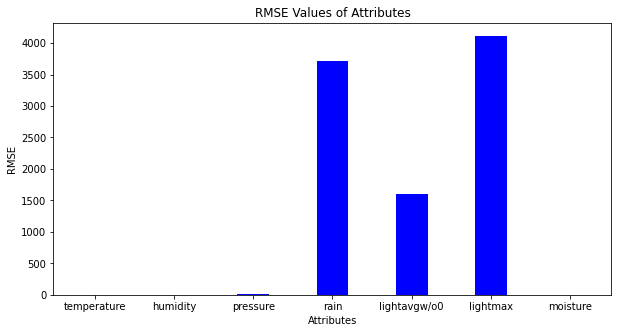

In [244]:
# Plotting a bar graph 
fig = plt.figure(figsize = (10, 5))

RMSE_V1_calc = RMSE_V1.squeeze()

values_RMSE_V1 = RMSE_V1_calc.to_list()

plt.bar(RMSE_V1.index ,values_RMSE_V1, color ='blue',
        width = 0.4)
 
plt.xlabel("Attributes")
plt.ylabel("RMSE")
plt.title("RMSE Values of Attributes")
plt.show()



In [245]:
# Doing the neccesary using interpolate

# Performing linear interploation 
df_Interpolated_missing_landslide_data = missing_landslide_data_numero.interpolate(method="linear")

# Finding the mean and std 
df_describe_std_mean = df_Interpolated_missing_landslide_data.describe()
df_describe_std_mean = df_describe_std_mean.drop(['count','min','25%','50%','75%','max'],axis = 0)
df_median = df_Interpolated_missing_landslide_data.median()
df_median = df_median.to_frame()
df_median = df_median.transpose()
df_median = df_median.rename(index={0:'Median'})
df_mode = df_Interpolated_missing_landslide_data.mode()
df_mode = df_mode.rename(index={0:'Mode'})
df_fromInterpolate_v2 = pd.concat([df_describe_std_mean,df_median,df_mode])
print(df_fromInterpolate_v2)

        temperature   humidity     pressure          rain  lightavgw/o0  \
mean      21.196222  83.538245  1009.264758  10651.638370   4486.340772   
std        4.329504  18.206727    45.998792  24779.512082   7573.795424   
Median    22.169210  91.380950  1014.677832     22.500000   1623.494100   
Mode      12.727270  99.000000   789.392692      0.000000   4488.910300   

            lightmax   moisture  
mean    21517.191005  32.327431  
std     21935.165741  33.602566  
Median   6569.000000  16.306600  
Mode     4000.000000   0.000000  


In [246]:
"""
    Difference between the values after Linear interpolation
"""
df_fromComplete_v2 = df_fromComplete_v1
df_new_v2_diff = df_fromComplete_v2 - df_fromInterpolate_v2
print("\n")
print("--------------------------------------------------------------")
print("Difference between the values after Linear interpolation : \n")
print(df_new_v2_diff)
print("--------------------------------------------------------------")
print("\n")



--------------------------------------------------------------
Difference between the values after Linear interpolation : 

        temperature  humidity  pressure       rain  lightavgw/o0    lightmax  \
mean       0.018666 -0.058314 -0.255984  49.900000    -47.912319  271.432275   
std        0.026314  0.003338  0.981686  72.743206     -0.632617  129.827347   
Median     0.103520  0.000000  0.000000  -4.500000     33.385900   65.000000   
Mode       0.000000  0.000000  0.000000   0.000000      0.000000    0.000000   

        moisture  
mean    0.058621  
std     0.050679  
Median  0.397600  
Mode    0.000000  
--------------------------------------------------------------




In [247]:
# Finding the RMSE

RMSE_V2 = FindRMSE(df_original_data_numero,df_Interpolated_missing_landslide_data,N)
print(RMSE_V2)


                     RMSE
temperature      0.490393
humidity         0.839313
pressure         7.033472
rain          1206.147686
lightavgw/o0  1241.591449
lightmax      3830.829336
moisture         1.273464


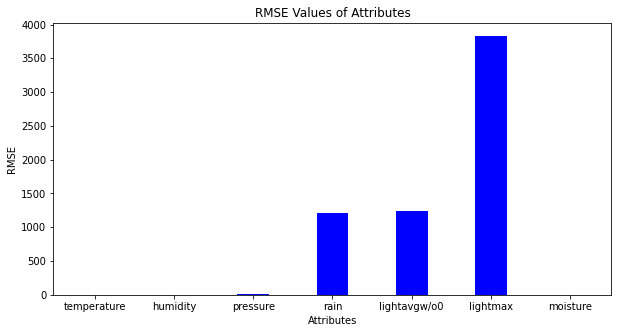

In [248]:
# Bar graph plot
fig = plt.figure(figsize = (10, 5))

RMSE_V2_cal = RMSE_V2.squeeze()

values_RMSE_V1 = RMSE_V2_cal.to_list()

plt.bar(RMSE_V2.index ,values_RMSE_V1, color ='blue',
        width = 0.4)
 
plt.xlabel("Attributes")
plt.ylabel("RMSE")
plt.title("RMSE Values of Attributes")
plt.show()

<AxesSubplot:>

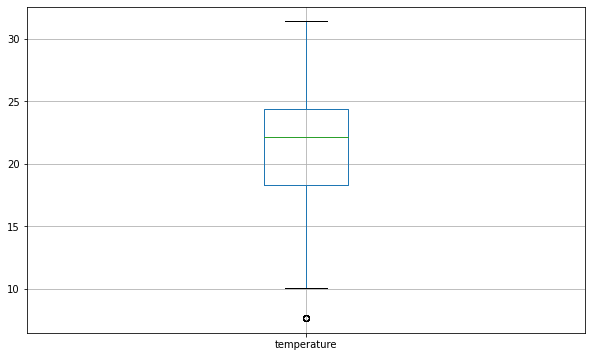

In [249]:
""" 
    Plotting the box plot to identify outliers
"""
plt.figure(figsize=(10,6))
# Temperature boxplot
df_Interpolated_missing_landslide_data.boxplot("temperature")

<AxesSubplot:>

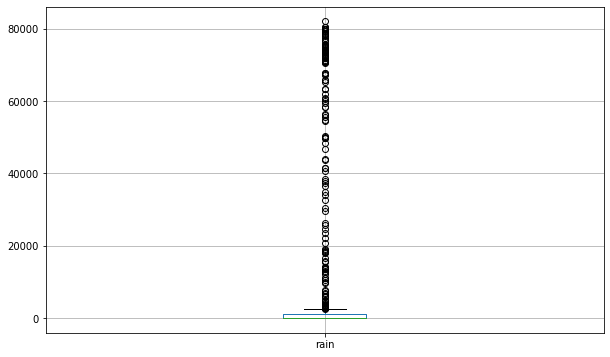

In [250]:
plt.figure(figsize=(10,6))
# Rain box plot
df_Interpolated_missing_landslide_data.boxplot("rain")

In [257]:
"""
    To find IQR 
    Returns : LowerBound , UpperBound
    """
def iqrCalculation(df):
    Quantile1 = df.quantile(0.25)
    Quantile3 = df.quantile(0.75)

    # Finding the iqr 
    InterQuantileRange = Quantile3-Quantile1
    median_value = df.median()

    # Defining the upper and lower bounds
    upper_bound = Quantile3+(1.5*InterQuantileRange)
    lower_bound = Quantile1-(1.5*InterQuantileRange)

    return upper_bound,lower_bound,median_value

In [258]:
# Finding the upper and lower bounds pf the outliers for temperature
upper_bound ,lower_bound,median_temperature = iqrCalculation(df_Interpolated_missing_landslide_data["temperature"])
# Finding the outliers in temperature 
outliers_temperature = df_Interpolated_missing_landslide_data["temperature"][(df_Interpolated_missing_landslide_data["temperature"] <= lower_bound) | (df_Interpolated_missing_landslide_data["temperature"] >= upper_bound)]
print('Outliers in Temperature  :\nIndex Temperature \n{}'.format(outliers_temperature))
outliers_temperature_list = outliers_temperature.to_list()

Outliers in Temperature  :
Index Temperature 
Series([], Name: temperature, dtype: float64)


In [259]:
# For Rain
# Finding the upper and lower bounds pf the outliers for temperature
upper_bound ,lower_bound ,median_rain = iqrCalculation(df_Interpolated_missing_landslide_data["rain"])

outliers_rain = df_Interpolated_missing_landslide_data["rain"][(df_Interpolated_missing_landslide_data["rain"] <= lower_bound) | (df_Interpolated_missing_landslide_data["rain"] >= upper_bound)]
print('Outliers in Rain  :\nIndex    Rain \n{}'.format(outliers_rain))
outliers_rain_list = outliers_rain.to_list()

Outliers in Rain  :
Index    Rain 
1      1761.75
2       652.50
3       963.00
4       254.25
5       339.75
        ...   
881     661.50
882    1946.25
921    1095.75
922    2340.00
932    2427.75
Name: rain, Length: 195, dtype: float64


22.16921 22.5


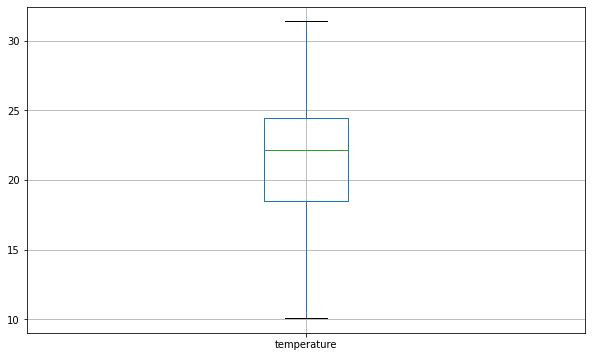

In [263]:
# Replacing outliers in temperature with median
df_Interpolated_missing_landslide_data["temperature"].replace(outliers_temperature_list,median_temperature,inplace= True)

#Replacing outliers in rain with median
df_Interpolated_missing_landslide_data["rain"].replace(outliers_rain_list,median_rain,inplace= True)

# Now drawing the boxplot for temperature
plt.figure(figsize=(10,6))
df_Interpolated_missing_landslide_data.boxplot("temperature")

print(median_temperature,median_rain)

<AxesSubplot:>

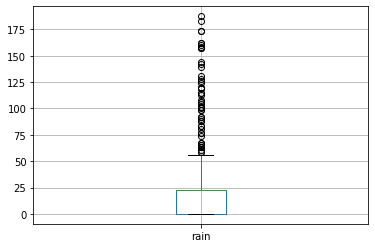

In [262]:
# Now drawing the boxplot for rain
plt.figure(figsize=(10,6))
df_Interpolated_missing_landslide_data.boxplot("rain") 


In [256]:
""" There is a change in the number of outliers , i.e ,
 initially the outliers in rain Ranged upto 8000 , but currently
 they have come down to ranges like 2500
 But they havent truly dissapeared , this is because median
 is not a true measure of data
 """

' There is a change in the number of outliers , i.e ,\n initially the outliers in rain Ranged upto 8000 , but currently\n they have come down to ranges like 2500\n But they havent truly dissapeared , this is because median\n is not a true measure of data\n '